# Data Science Project

## Movie Rating Prediction

## Rajat Dua

## 1 Data Exploration

### 1.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2 Reading The Data

In [2]:
df = pd.read_csv("movie_metadata.csv")

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


### 1.3 Information and Statistics about Data

In [5]:
df.shape

(5043, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [7]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## 2 Data Cleaning

### 2.1 Missing Values

In [8]:
print((df.isnull().sum()/len(df))*100 >0)

color                         True
director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
movie_imdb_link              False
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool


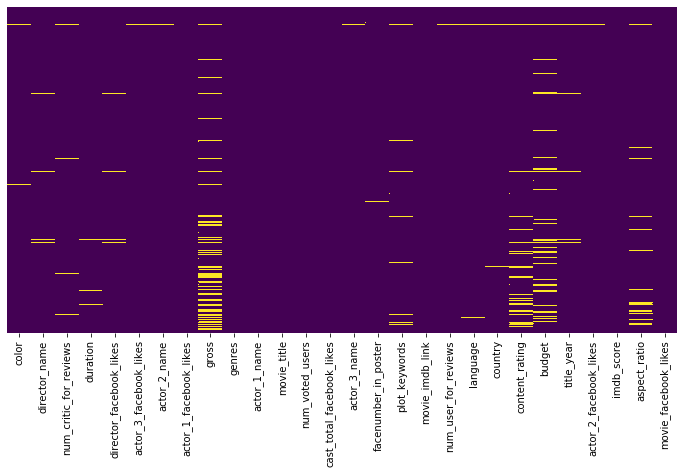

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [10]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### 2.1.1 Drop Duplicate Data

In [11]:
dups=df.duplicated()
df[dups].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000


In [12]:
df[dups].shape[0]

45

In [13]:
df.drop_duplicates(inplace = True)

#### 2.1.2 Delete Some Rows

In [14]:
df = df.dropna(subset = ['gross', 'budget'])

In [15]:
df.shape

(3857, 28)

#### 2.1.3 Analyze Aspect Ratio

In [16]:
df['aspect_ratio'].value_counts(dropna = False)

2.35     1995
1.85     1600
NaN        74
1.37       50
1.78       41
1.66       40
1.33       19
2.39       11
2.20       10
2.40        3
2.76        3
2.00        3
1.75        2
1.18        1
2.24        1
1.77        1
16.00       1
2.55        1
1.50        1
Name: aspect_ratio, dtype: int64

In [17]:
df.fillna({'aspect_ratio': 0.00},inplace = True)

In [18]:
df['imdb_score'][df['aspect_ratio'] == 2.35].mean()

6.508471177944862

In [19]:
df['imdb_score'][df['aspect_ratio'] == 1.85].mean()

6.373937500000018

In [20]:
df['imdb_score'][(df['aspect_ratio'] != 1.85) & (df['aspect_ratio'] != 2.35)].mean()

6.672519083969459

Average IMDB scores varies from 6.3 to 6.7. Therefore, aspect ratio does not have much affect on imdb score. So we can remove this column. 

In [21]:
df = df.drop('aspect_ratio', axis = 1)

#### 2.1.4 Fill NaN Values

In [22]:
df.fillna({'num_critic_for_reviews': df['num_critic_for_reviews'].mean(),
           'duration': df['duration'].mean(),
           'director_facebook_likes': df['director_facebook_likes'].mean(),
           'actor_3_facebook_likes' : df['actor_3_facebook_likes'].mean(),
           'actor_1_facebook_likes': df['actor_1_facebook_likes'].mean(),
           'actor_2_facebook_likes': df['actor_2_facebook_likes'].mean(),
           'facenumber_in_poster': df['facenumber_in_poster'].mean()
          },inplace = True)

#### 2.1.5 Analyzing Content Rating

In [23]:
df.dropna(subset = ['content_rating'], inplace=True)

In [24]:
df['content_rating'].value_counts(dropna = False)

R            1723
PG-13        1314
PG            573
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

According to the naming convention, we find that M = GP = PG, and X = NC-17. Therefore, we want to replace M and GP with PG, replace X with NC-17, because these two are what we use nowadays. Also, we want to replace “Approved”, “Not Rated”, “Passed”, “Unrated” with the most common rating “R”.

In [25]:
df.replace({'content_rating': {'M':'PG', 'GP': 'PG', 'Approved': 'R', 
                               'Passed': 'R', 'Unrated': 'R', 'Not Rated': 'R', 
                               'X': 'NC-17'}}, inplace=True)

In [26]:
df['content_rating'].value_counts(dropna = False)

R        1809
PG-13    1314
PG        576
G          91
NC-17      16
Name: content_rating, dtype: int64

Now we have only 5 different content ratings

### 2.2 Add Columns

In [27]:
df['profit'] = df['gross'] - df['budget']
df['return_on_investment'] = (df['profit']/df['budget'])*100

In [28]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


### 2.3 Remove Columns

#### 2.3.1 Is the color of the movie predictive?

In [29]:
df['color'].value_counts(dropna = False)

Color               3680
 Black and White     124
NaN                    2
Name: color, dtype: int64

Almost 96% of the movies are colored, therefore, color has no predictive power for imdb score. We can remove color column.

In [30]:
df.drop('color', axis=1, inplace=True)

#### 2.3.2 Is language an important predictor of imdb score?

In [31]:
df['language'].value_counts(dropna = False)

English       3644
French          34
Spanish         24
Mandarin        14
German          11
Japanese        10
Italian          7
Cantonese        7
Portuguese       5
Hindi            5
Korean           5
Norwegian        4
Persian          3
Thai             3
Danish           3
Dutch            3
Hebrew           2
Aboriginal       2
NaN              2
Indonesian       2
Dari             2
Zulu             1
Mongolian        1
Romanian         1
Maya             1
Hungarian        1
Russian          1
Arabic           1
Kazakh           1
Bosnian          1
Aramaic          1
Filipino         1
Vietnamese       1
None             1
Czech            1
Name: language, dtype: int64

More than 90% of the movies are in english language, therefore, language has no predictive power for imdb score. We can remove the language column.

In [32]:
df = df.drop('language', axis = 1)

#### 2.3.3 What about country?

In [33]:
df['country'].value_counts(dropna = False)

USA               3025
UK                 316
France             103
Germany             79
Canada              63
Australia           40
Spain               22
Japan               15
Hong Kong           13
China               13
New Zealand         11
Italy               11
Mexico              10
Denmark              9
South Korea          8
Ireland              7
India                5
Brazil               5
Iran                 4
Norway               4
Thailand             4
Argentina            3
Russia               3
South Africa         3
Czech Republic       3
Netherlands          3
Israel               2
Hungary              2
Taiwan               2
Romania              2
Belgium              1
Indonesia            1
New Line             1
Georgia              1
Iceland              1
Official site        1
Peru                 1
Chile                1
Aruba                1
Finland              1
Colombia             1
Poland               1
Philippines          1
West German

Around 79% of the movies are from the USA, 8% from the UK and the rest 13% are from other countries. So we group other countries together to make this categorical variable with less value counts.

In [34]:
df.loc[(df['country'] != 'USA') & (df['country'] != 'UK'), 'country'] = 'Others'

In [35]:
df['country'].value_counts()

USA       3025
Others     465
UK         316
Name: country, dtype: int64

#### 2.3.4 Check for Missing Values in Cleaned Data

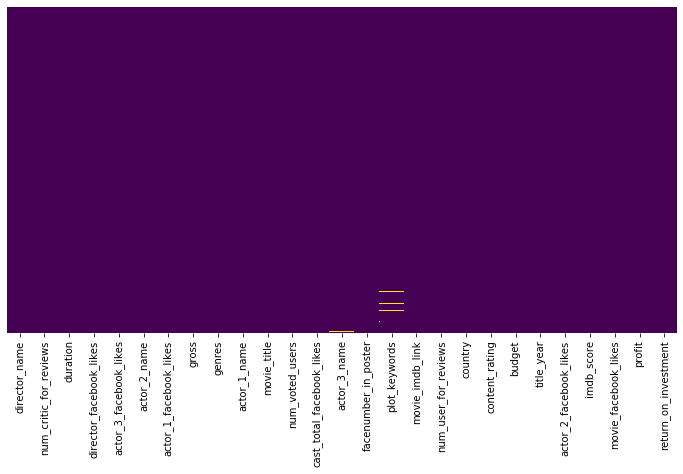

In [36]:
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [37]:
df.shape

(3806, 27)

### 2.4 Analyzing Genre Column

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
df['genres'].head()

0    Action|Adventure|Fantasy|Sci-Fi
1           Action|Adventure|Fantasy
2          Action|Adventure|Thriller
3                    Action|Thriller
5            Action|Adventure|Sci-Fi
Name: genres, dtype: object

First, we want to know if genre is related to imdb score. We divide the string into several substrings by the separator ‘|’, and save each substring along with its corresponding imdb score in the other data frame genres.df. Then we plot a histogram for the score and genres to see if they are relative or not.

In [40]:
genre_df = df[['genres', 'imdb_score']]

In [41]:
genre_df['Action'] = genre_df['genres'].apply(lambda x: 1 if 'Action' in x.split('|') else 0)
genre_df['Adventure'] = genre_df['genres'].apply(lambda x: 1 if 'Adventure' in x.split('|') else 0)
genre_df['Animation'] = genre_df['genres'].apply(lambda x: 1 if 'Animation' in x.split('|') else 0)
genre_df['Biography'] = genre_df['genres'].apply(lambda x: 1 if 'Biography' in x.split('|') else 0)
genre_df['Comedy'] = genre_df['genres'].apply(lambda x: 1 if 'Comedy' in x.split('|') else 0)
genre_df['Crime'] = genre_df['genres'].apply(lambda x: 1 if 'Crime' in x.split('|') else 0)
genre_df['Documentary'] = genre_df['genres'].apply(lambda x: 1 if 'Documentary' in x.split('|') else 0)
genre_df['Drama'] = genre_df['genres'].apply(lambda x: 1 if 'Drama' in x.split('|') else 0)
genre_df['Family'] = genre_df['genres'].apply(lambda x: 1 if 'Family' in x.split('|') else 0)
genre_df['Fantasy'] = genre_df['genres'].apply(lambda x: 1 if 'Fantasy' in x.split('|') else 0)
genre_df['History'] = genre_df['genres'].apply(lambda x: 1 if 'History' in x.split('|') else 0)
genre_df['Horror'] = genre_df['genres'].apply(lambda x: 1 if 'Horror' in x.split('|') else 0)
genre_df['Musical'] = genre_df['genres'].apply(lambda x: 1 if 'Musical' in x.split('|') else 0)
genre_df['Mystery'] = genre_df['genres'].apply(lambda x: 1 if 'Mystery' in x.split('|') else 0)
genre_df['Romance'] = genre_df['genres'].apply(lambda x: 1 if 'Romance' in x.split('|') else 0)
genre_df['Sci-Fi'] = genre_df['genres'].apply(lambda x: 1 if 'Sci-Fi' in x.split('|') else 0)
genre_df['Sport'] = genre_df['genres'].apply(lambda x: 1 if 'Sport' in x.split('|') else 0)
genre_df['Thriller'] = genre_df['genres'].apply(lambda x: 1 if 'Thriller' in x.split('|') else 0)
genre_df['War'] = genre_df['genres'].apply(lambda x: 1 if 'War' in x.split('|') else 0)
genre_df['Western'] = genre_df['genres'].apply(lambda x: 1 if 'Western' in x.split('|') else 0)
genre_df['Film-Noir'] = genre_df['genres'].apply(lambda x: 1 if 'Film-Noir' in x.split('|') else 0)


In [42]:
genre_df.head()

,genres,imdb_score,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Film-Noir
0,Action|Adventure|Fantasy|Sci-Fi,7.9,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Action|Adventure|Fantasy,7.1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Action|Adventure|Thriller,6.8,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Action|Thriller,8.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,Action|Adventure|Sci-Fi,6.6,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
means = np.zeros(21)

for i in np.arange(0,21):
    means[i] = np.mean(genre_df['imdb_score'][genre_df.iloc[:, i+2] == 1])

In [44]:
means

array([6.28756531, 6.45396419, 6.70252525, 7.14232365, 6.18013468,
       6.54140845, 6.99818182, 6.78192708, 6.21275168, 6.28960784,
       7.12960526, 5.92268041, 6.5877551 , 6.47049608, 6.42799539,
       6.32343434, 6.602     , 6.37634892, 7.03717949, 6.75666667,
       7.7       ])

In [45]:
genre = genre_df.columns

In [46]:
genre = genre.drop(['genres', 'imdb_score'])

In [47]:
index = genre
data = means.ravel()

In [48]:
genre = pd.DataFrame(data = data, index = index, columns = ['Means'])

In [49]:
genre.head()

,Means
Action,6.287565
Adventure,6.453964
Animation,6.702525
Biography,7.142324
Comedy,6.180135


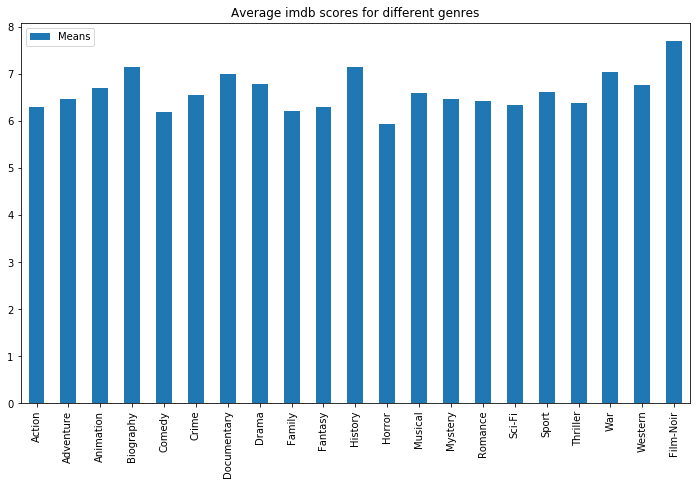

In [50]:
genre.plot(kind = 'bar', figsize = (12,7), title = 'Average imdb scores for different genres')

There isn’t much difference in the averages of imdb score related to different genres, almost all the averages are in the same range of 6~8. So the predictor “genres” can be removed because it’s not really related to the score.

In [51]:
df.drop('genres', axis = 1, inplace=True)

### 2.5 Analysing the Cleaned Data

In [52]:
df.shape

(3806, 26)

In [53]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


In [54]:
numeric_data = df.select_dtypes(include = [np.number])

categorical_data = df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 17 numerical and 9 categorical features in the data


In [55]:
categorical_data.head()

,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,country,content_rating
0,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,USA,PG-13
1,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,USA,PG-13
2,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,UK,PG-13
3,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,USA,PG-13
5,Andrew Stanton,Samantha Morton,Daryl Sabara,John Carter,Polly Walker,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,USA,PG-13


In [56]:
numeric_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


## 3 Exploratory Data Analysis

### 3.1 Distance Plot of Gross Revenue

Text(0.5, 0, 'Gross Income')

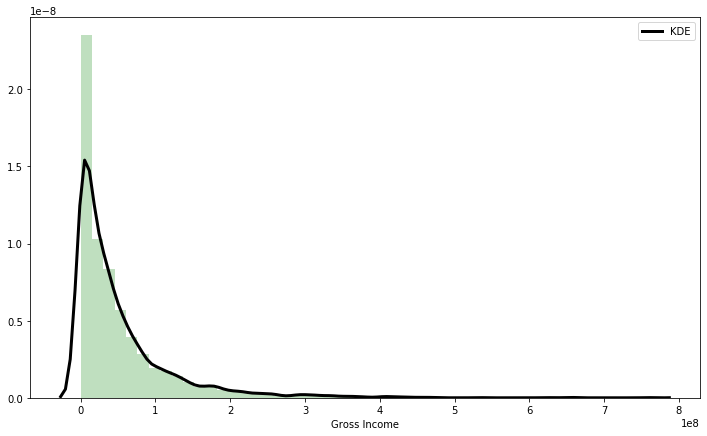

In [57]:
plt.figure(figsize = (12,7))
sns.distplot(df['gross'], bins = 50, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 0.25, "color": "g"})
plt.xlabel('Gross Income')

### 3.2 Distance Plot of log of Gross Revenue

Text(0.5, 0, 'Gross Income')

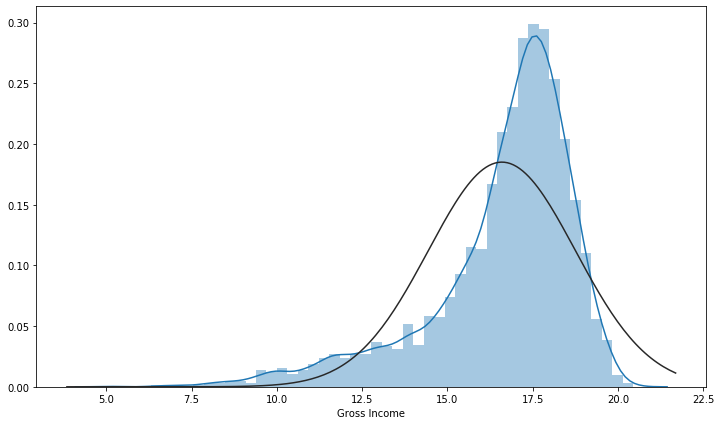

In [58]:
from scipy.stats import norm
plt.figure(figsize = (12,7))
sns.distplot(np.log(df['gross']), fit = norm)
plt.xlabel('Gross Income')

### 3.3 Distance Plot of Budget column

Text(0.5, 0, 'Budget')

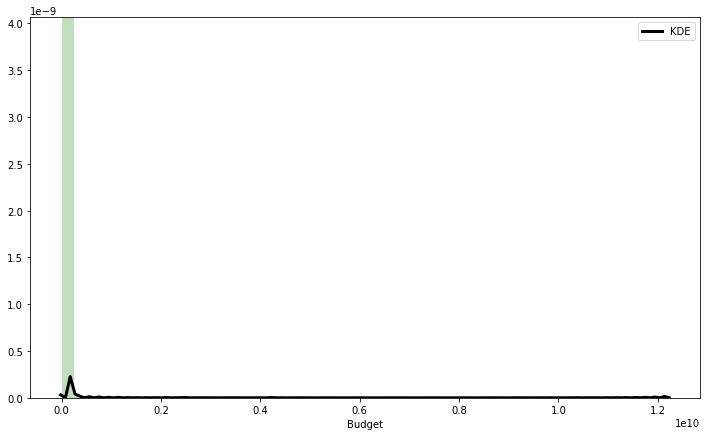

In [59]:
plt.figure(figsize = (12,7))
sns.distplot(df['budget'], bins = 50, kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 3, "alpha": 0.25, "color": "g"})
plt.xlabel('Budget')

### 3.4 Distance Plot of log of Budget column

Text(0.5, 0, 'Budget')

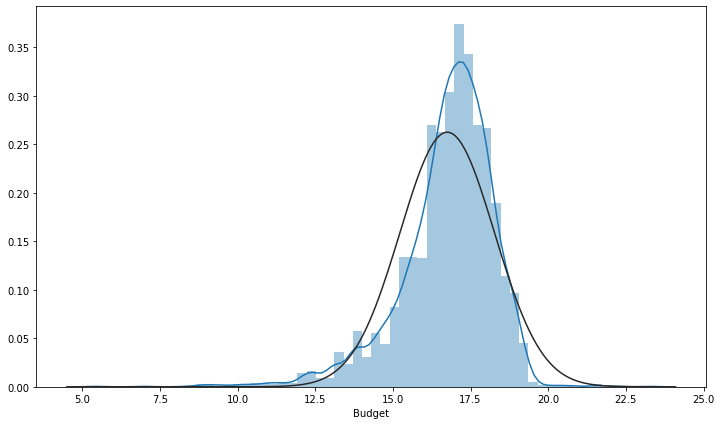

In [60]:
from scipy.stats import norm
plt.figure(figsize = (12,7))
sns.distplot(np.log(df['budget']), bins = 60, fit = norm)
plt.xlabel('Budget')

### 3.5 Variation of Sum of Total Budget and Income with Time in Years

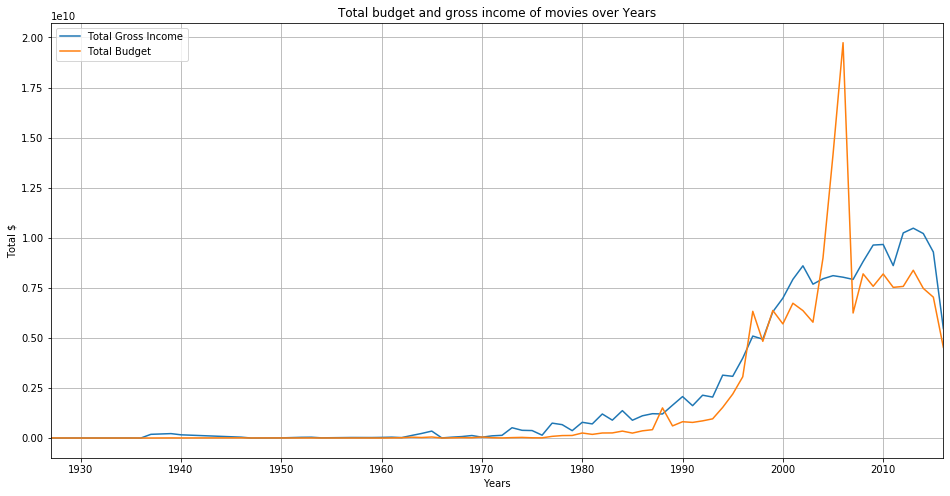

In [61]:
df.groupby(['title_year'])['gross'].sum().plot(label = 'Total Gross Income', figsize = (16,8))
df.groupby(['title_year'])['budget'].sum().plot(label = 'Total Budget')
plt.title('Total budget and gross income of movies over Years')
plt.xlabel('Years')
plt.ylabel('Total $')
plt.grid()
plt.legend();

### 3.6 Variation of Average of Total Budget and Income with Time in Years

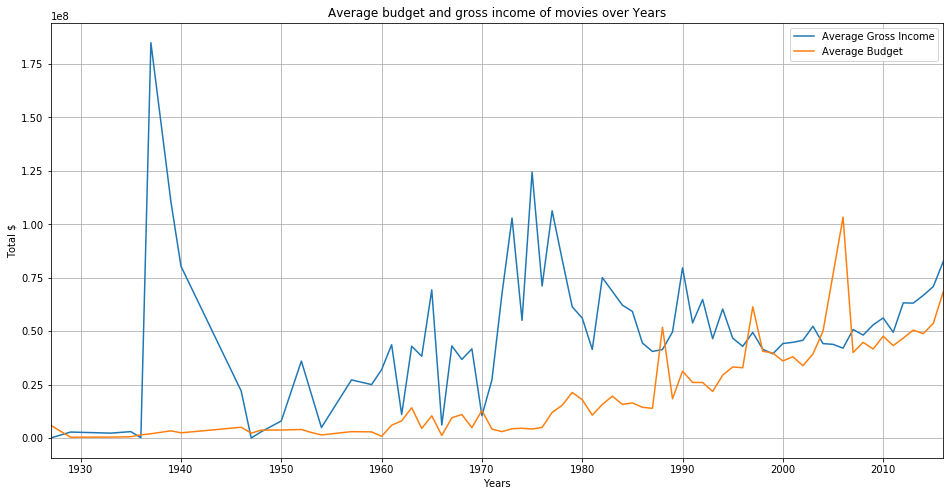

In [62]:
df.groupby(['title_year'])['gross'].mean().plot(label = 'Average Gross Income', figsize = (16,8))
df.groupby(['title_year'])['budget'].mean().plot(label = 'Average Budget')
plt.title('Average budget and gross income of movies over Years')
plt.xlabel('Years')
plt.ylabel('Total $')
plt.grid()
plt.legend();

### 3.7 Histogram of Movie Released
Movie production just exploded after year 1990. It could be due to advancement in technology and commercialization of internet.

Text(0, 0.5, 'Movie Count')

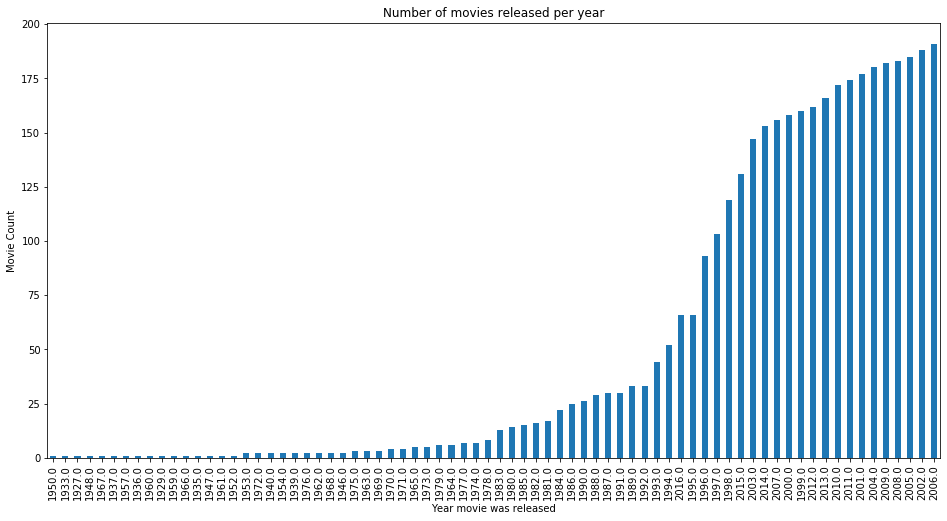

In [63]:
df['title_year'].value_counts().sort_values().plot(kind = 'bar', figsize = (16,8))
plt.title('Number of movies released per year')
plt.xlabel('Year movie was released')
plt.ylabel('Movie Count')

From the graph, we see there aren’t many records of movies released before 1980. It’s better to remove those records because they might not be representative.

In [64]:
df = df.loc[df['title_year'] >= 1980]

Text(0, 0.5, 'Movie Count')

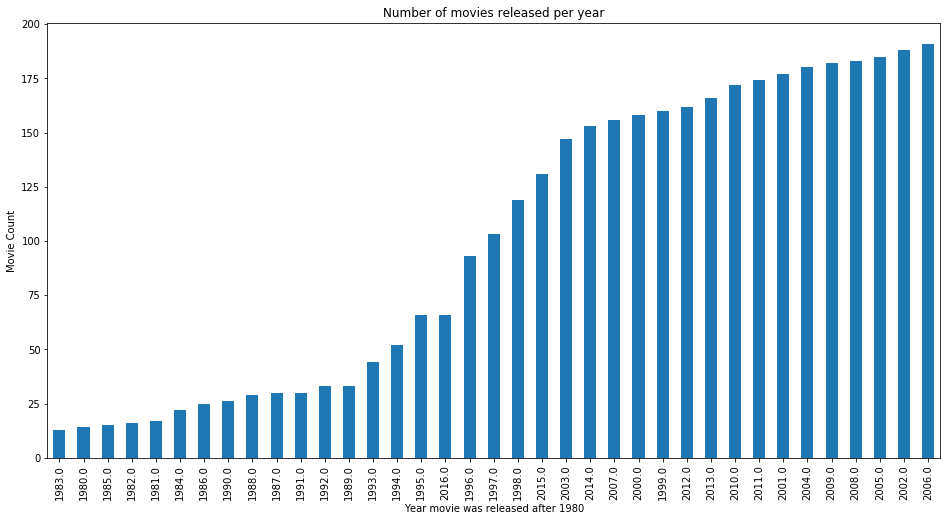

In [65]:
df['title_year'].value_counts().sort_values().plot(kind = 'bar', figsize = (16,8))
plt.title('Number of movies released per year')
plt.xlabel('Year movie was released after 1980')
plt.ylabel('Movie Count')

In [66]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


### 3.8 Relation between number of facebook likes and imdb_score

Text(0.5, 1.0, 'IMDB score vs Facebook likes')

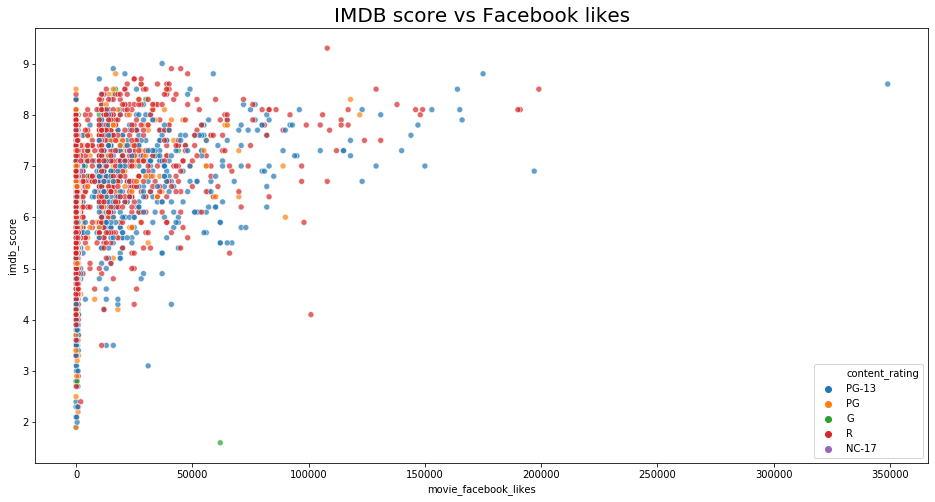

In [67]:
plt.figure(figsize = (16,8))
sns.scatterplot(x="movie_facebook_likes", y = "imdb_score", hue="content_rating",alpha = 0.7, data=df)
plt.title('IMDB score vs Facebook likes', fontsize=20)

We divide this scatter plot by content-rating. Movie with extremely high Facebook likes tend to have higher imdb score. But the score for movie with low Facebook likes vary in a very wide range.

### 3.9 Average IMDB scores by content rating

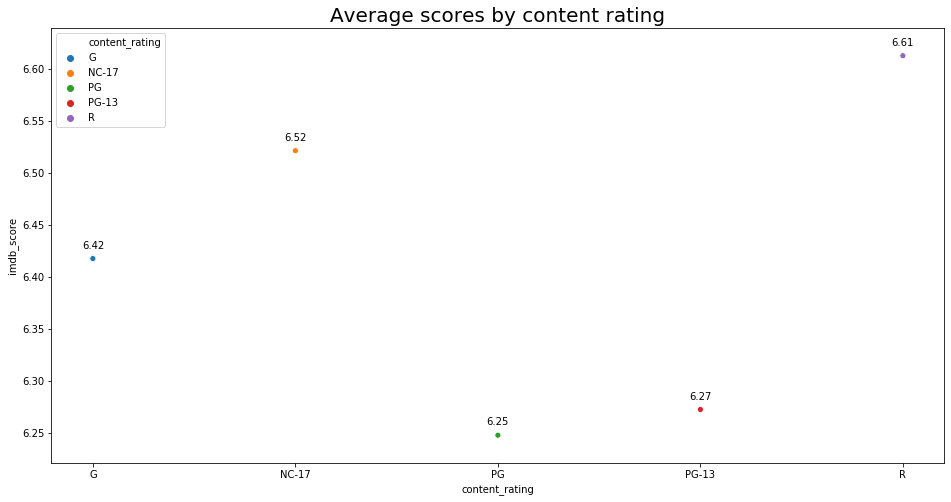

In [68]:
plt.figure(figsize = (16,8))
content=df.groupby("content_rating")["imdb_score"].mean().reset_index()
x = content['content_rating']
y = content['imdb_score']
sns.scatterplot(x, y, hue=x)
plt.title('Average scores by content rating', fontsize=20)
for x,y in zip(x,y):

    label = "{:.2f}".format(y)

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 

### 3.10 Average IMDB scores by year after 1980

In [69]:
years=df.groupby("title_year")["imdb_score"].mean().reset_index()
x = years['title_year']
y = years['imdb_score']

Text(0.5, 1.0, 'Average scores by year')

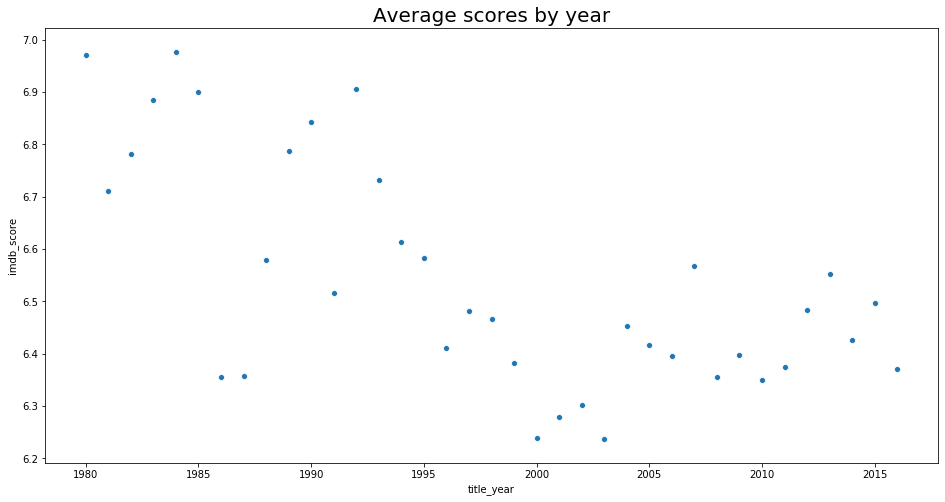

In [70]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x, y)
plt.title('Average scores by year', fontsize=20)

### 3.11 Top 20 directors with highest average IMDB score

In [71]:
director=df.groupby("director_name")["imdb_score"].mean().sort_values(ascending=False).reset_index()
director.head(20)

,director_name,imdb_score
0,Tony Kaye,8.600000
1,Majid Majidi,8.500000
2,Damien Chazelle,8.500000
3,Ron Fricke,8.500000
4,Christopher Nolan,8.425000
5,Marius A. Markevicius,8.400000
6,Sergio Leone,8.400000
7,Asghar Farhadi,8.400000
8,Richard Marquand,8.400000
9,Lenny Abrahamson,8.300000


### 3.12 Distance Plot of Profit column

Text(0.5, 1.0, 'Profit')

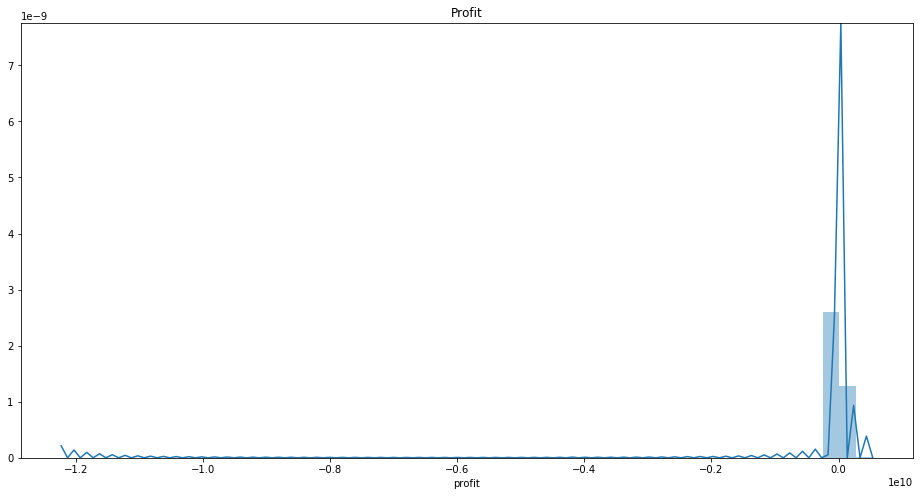

In [72]:
plt.figure(figsize = (16, 8))
sns.distplot(df['profit'])
plt.title('Profit')

### 3.13 LM Plot comparing Gross Income Vs Budget

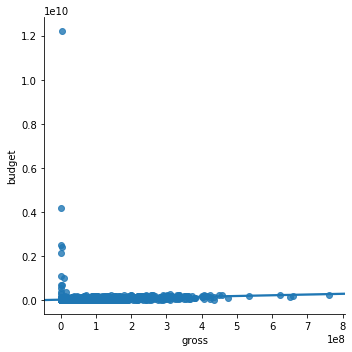

In [73]:
sns.lmplot('gross', 'budget', data=df)

### 3.14 Top 10 Movies by Profit

In [74]:
top_movies = df.sort_values(by='profit', ascending=False)
top_movies.head(10)[['movie_title', 'profit', 'budget', 'gross']]

,movie_title,profit,budget,gross
0,Avatar,523505847.0,237000000.0,760505847.0
29,Jurassic World,502177271.0,150000000.0,652177271.0
26,Titanic,458672302.0,200000000.0,658672302.0
3080,E.T. the Extra-Terrestrial,424449459.0,10500000.0,434949459.0
17,The Avengers,403279547.0,220000000.0,623279547.0
509,The Lion King,377783777.0,45000000.0,422783777.0
240,Star Wars: Episode I - The Phantom Menace,359544677.0,115000000.0,474544677.0
66,The Dark Knight,348316061.0,185000000.0,533316061.0
439,The Hunger Games,329999255.0,78000000.0,407999255.0
812,Deadpool,305024263.0,58000000.0,363024263.0


### 3.15 Worst 10 Movies by Profit

In [75]:
worst_movies = df.sort_values(by='profit', ascending=True)
worst_movies.head(10)[['movie_title', 'profit', 'budget', 'gross']]

,movie_title,profit,budget,gross
2988,The Host,-1.221330e+10,1.221550e+10,2201412.0
3859,Lady Vengeance,-4.199788e+09,4.200000e+09,211667.0
3005,Fateless,-2.499804e+09,2.500000e+09,195888.0
2323,Princess Mononoke,-2.397702e+09,2.400000e+09,2298191.0
2334,Steamboy,-2.127110e+09,2.127520e+09,410388.0
3423,Akira,-1.099561e+09,1.100000e+09,439162.0
4542,Godzilla 2000,-9.899626e+08,1.000000e+09,10037390.0
3851,Tango,-6.983127e+08,7.000000e+08,1687311.0
3075,Kabhi Alvida Naa Kehna,-6.967246e+08,7.000000e+08,3275443.0
1338,Red Cliff,-5.530052e+08,5.536320e+08,626809.0


### 3.16 Distance Plot of Budget and log of Budget

Text(0.5, 0.98, 'Budget')

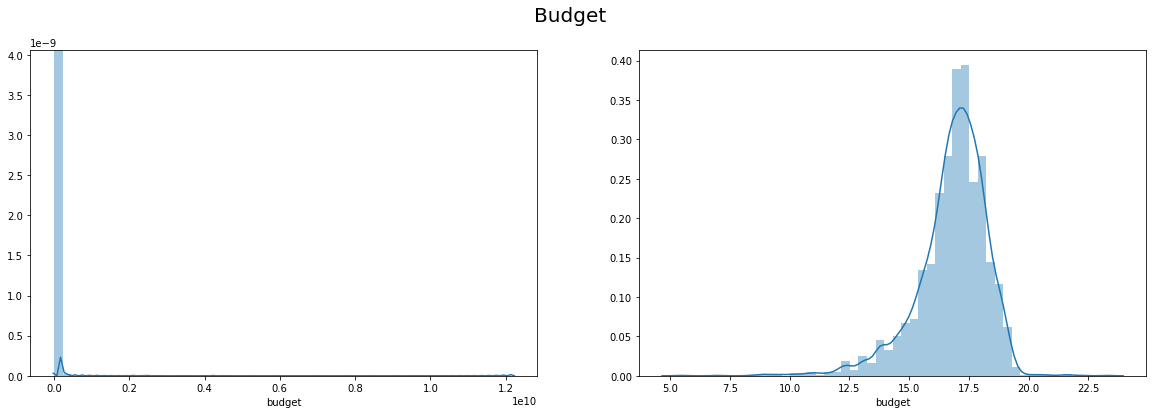

In [76]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['budget'])
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df['budget']))
fig.suptitle('Budget', fontsize=20)

### 3.17 Scatter Plot of Budget vs Gross Revenue and log of Budget vs Gross Revenue

Text(0, 0.5, 'Gross Revenue')

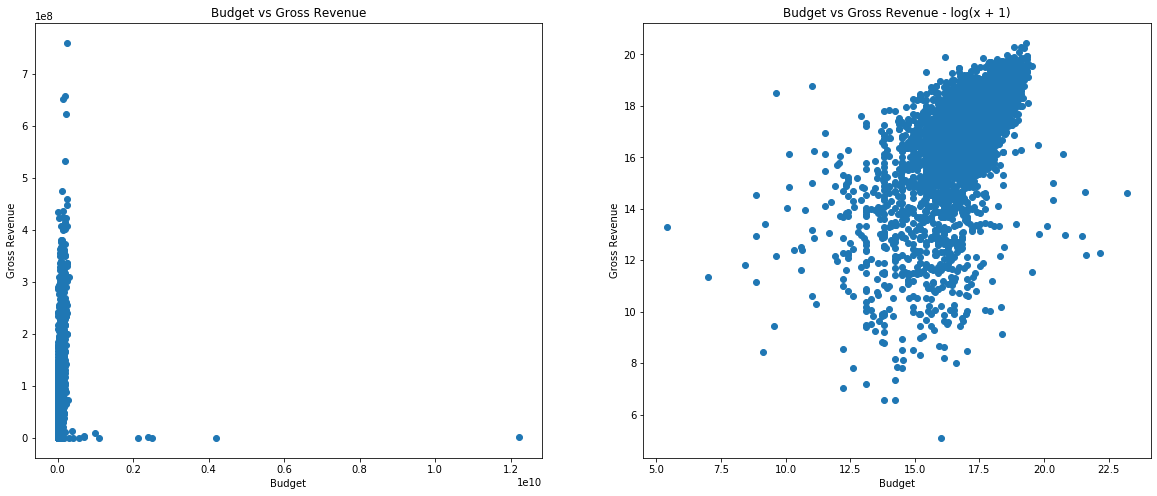

In [77]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

plt.subplot(1, 2, 2)
plt.scatter(np.log1p(df['budget']), np.log1p(df['gross']))
plt.title('Budget vs Gross Revenue - log(x + 1)')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

### 3.18 Bar Plot of Gross Revenue/Budget per year

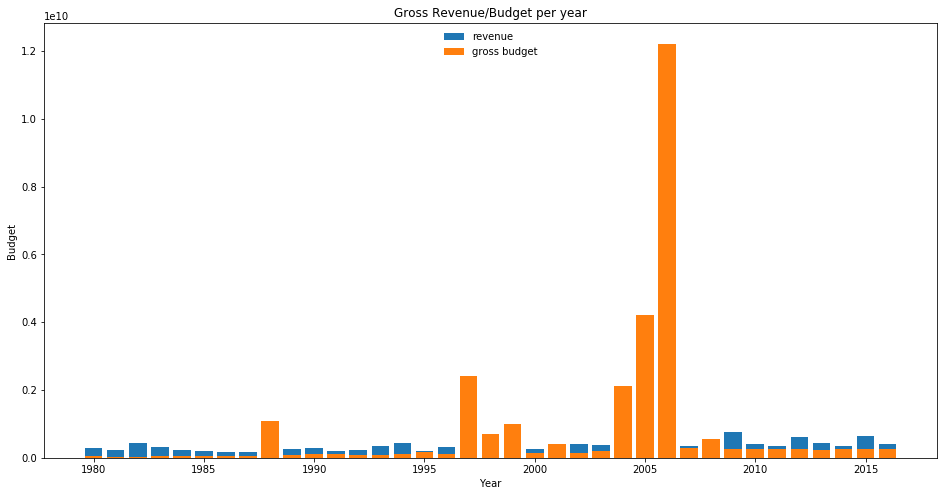

In [78]:
plt.figure(figsize=(16, 8))
plt.bar(df['title_year'], df['gross'], label='revenue')
plt.bar(df['title_year'], df['budget'], label='gross budget')
plt.title('Gross Revenue/Budget per year')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.legend(loc='upper center', frameon=False)

### 3.19 Joint Plot of Budget  vs Gross Revenue

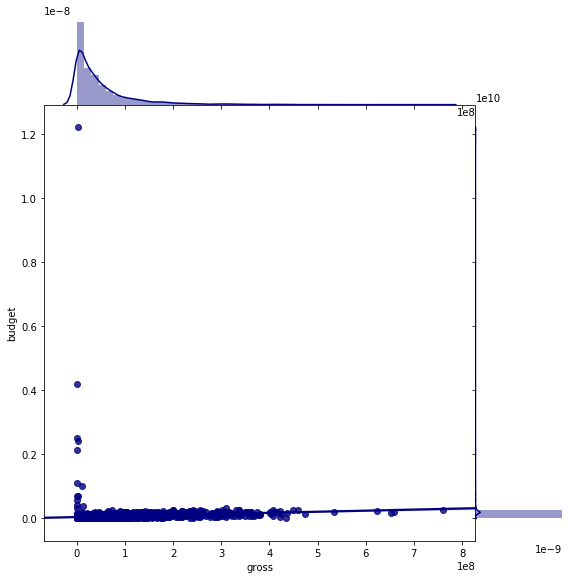

In [79]:
sns.jointplot(x='gross', y='budget', data=df, color='navy', size=8, space=0, kind='reg');

### 3.20 Joint Plot of Facenumber in Poster vs Gross Revenue

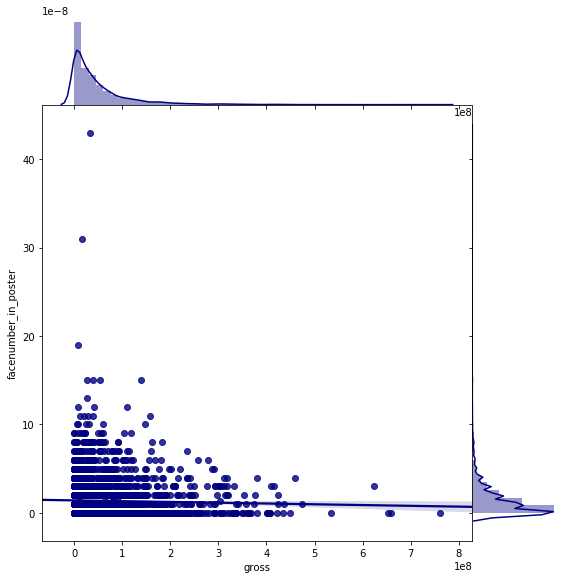

In [80]:
sns.jointplot(x='gross', y='facenumber_in_poster', data=df, color='navy', size=8, space=0, kind='reg');

### 3.21 Joint Plot of Facebook Movie Likes vs Gross Revenue

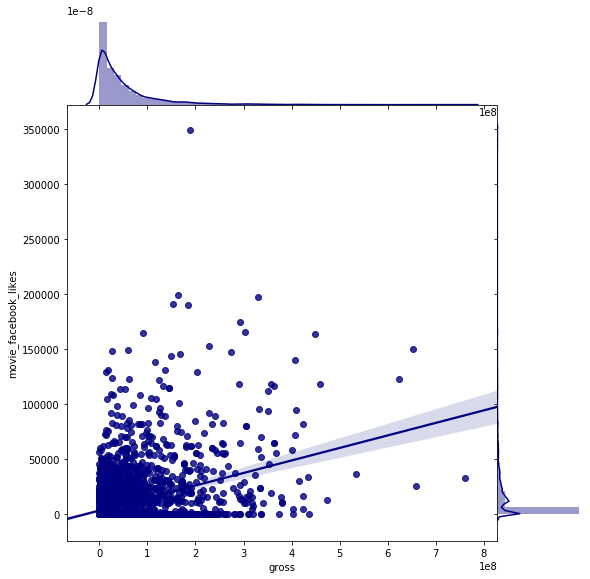

In [81]:
sns.jointplot(x='gross', y='movie_facebook_likes', data=df, color='navy', size=8, space=0, kind='reg');

### 3.22 Is the type of film content rating important for its profitability?
To know that, we need to create a new column, revenue_budget_ratio.

In [82]:
df.shape

(3711, 26)

In [83]:
data = df.copy()
data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,...,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,profit,return_on_investment
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,...,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000,523505847.0,220.888543
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0,9404152.0,3.134717
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,...,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000,-44925825.0,-18.337071
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000,198130642.0,79.252257
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000,-190641321.0,-72.294775


                gross_budget_ratio
content_rating                    
PG                        2.453530
PG-13                     1.728231
R                         2.131983


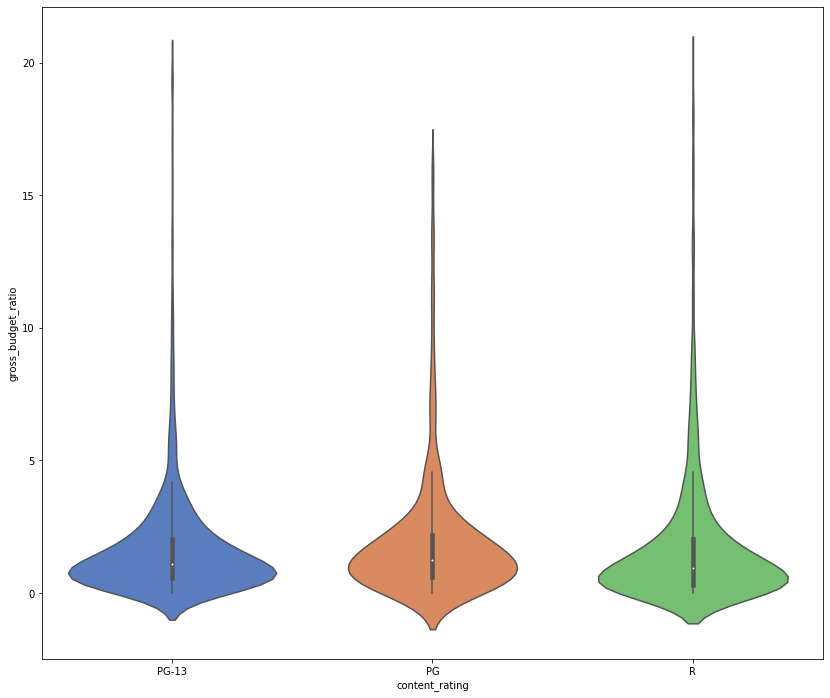

In [84]:
#We'll filter by a budget of $100k to avoid independent films
minbudget = 100000
data['gross_budget_ratio'] = data['gross'][data['budget']>minbudget]/data['budget'][data['budget']>minbudget]

#We will filter to show only ratings with more than 100 films in the DB
ratinglist = df.content_rating.value_counts()[df.content_rating.value_counts() >= 100]

fig, ax = plt.subplots(figsize=(14,12));
ax = sns.violinplot(x='content_rating', y="gross_budget_ratio"
                    ,data=data[data.content_rating.isin(ratinglist.index.values[:])][data.gross_budget_ratio<20]
                    , palette="muted", split=True)
ax.set_ylim = (100)

print(data[['gross_budget_ratio','content_rating']][data.content_rating.isin(ratinglist.index.values[:])]
      .groupby('content_rating').mean())

We can see how the content rating is in fact affecting the ratio distribution shape, with the PG rated films being the ones with a higher profitability ratio and the PG-13 have a lower one.

### 3.23 Is budget a factor in profitability of films?

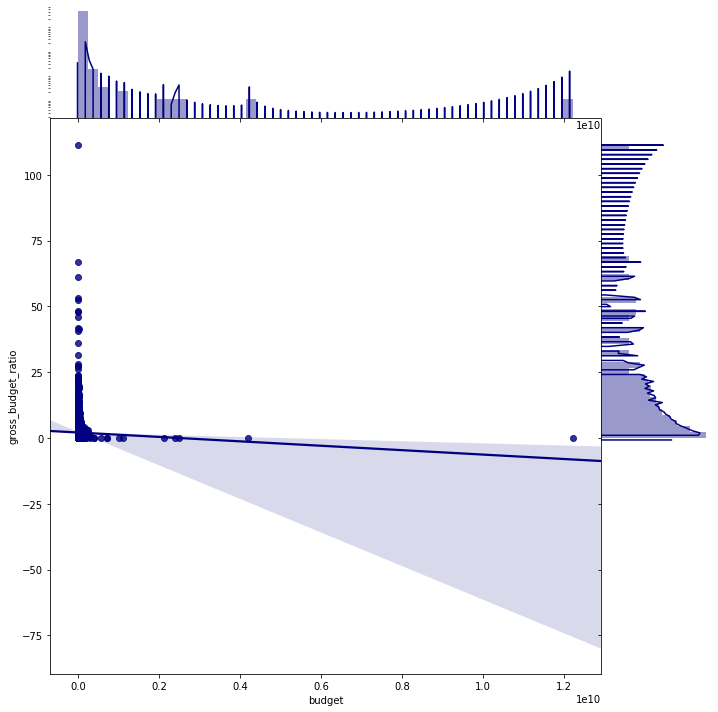

In [85]:
sns.jointplot(x='budget', y='gross_budget_ratio', data=data, kind='reg', color='navy'
              , size=10, space=0,marginal_kws={'hist_kws': {'log': True}})

We can see how, although budget strongly correlates with revenue, it does negatively affect the films potential for profitability.

### 3.24 Does having more FB likes relates to a higher profitability for directors?

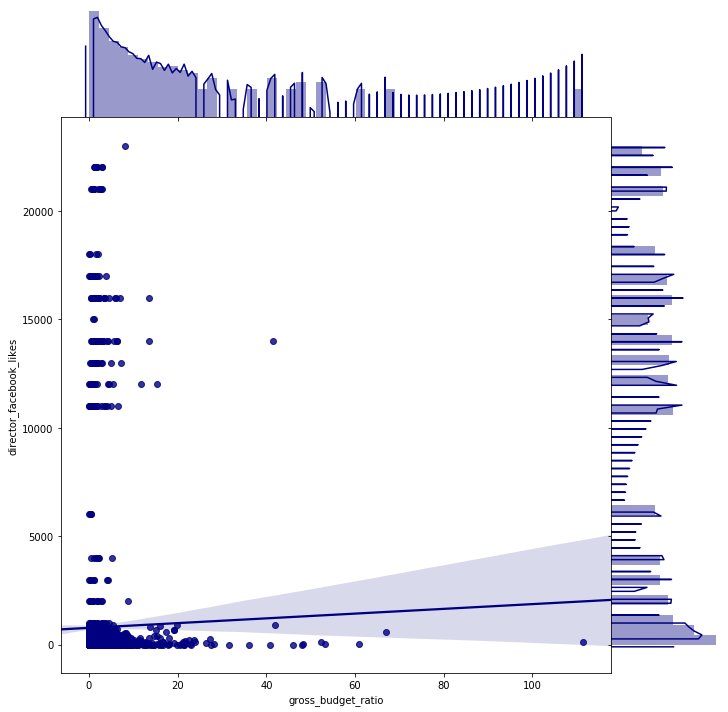

In [86]:
sns.jointplot(x='gross_budget_ratio', y='director_facebook_likes', data=data, color='navy', kind='reg'
              , size=10, space=0,marginal_kws={'hist_kws': {'log': True}})

The number of FB likes of the director and film profitability (revenue/budget ratio) doesn't seem to be important.

### 3.25 What if we chose to compare against the gross revenue of their films?

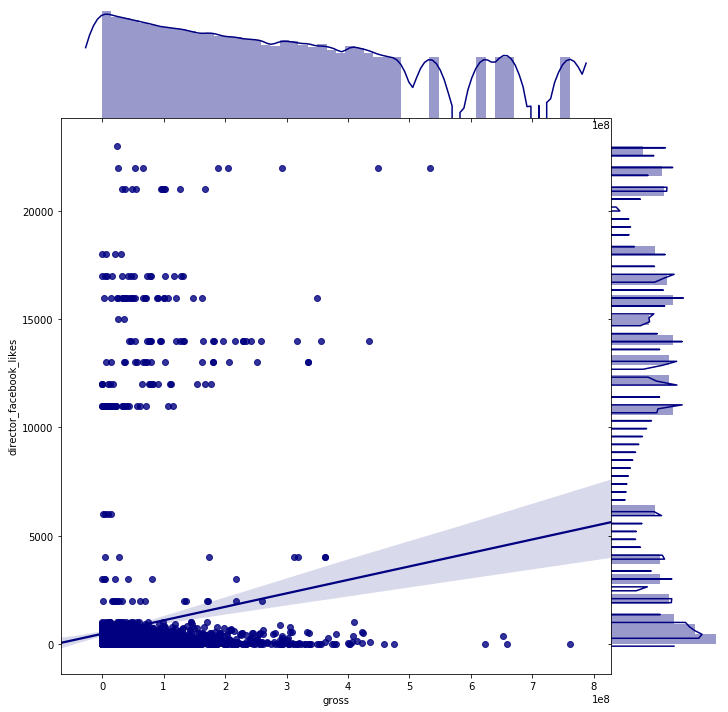

In [87]:
sns.jointplot(x='gross', y='director_facebook_likes', data=data, color='navy', kind='reg'
              , size=10, space=0,marginal_kws={'hist_kws': {'log': True}})

We can see how the directors of films with great gross revenues tend to have more FB likes, although that doesn't seem to imply that the profitability of their films are higher.

### 3.26 We're going to review now what films in our database are the biggest flops. To do so, we will:
Filter first by films with budget lower than gross revenue.

Filter by those films with cast total likes is under 100000 and number of voted users atleast 200000.

Finally, sort those films by the amount of money they lost.

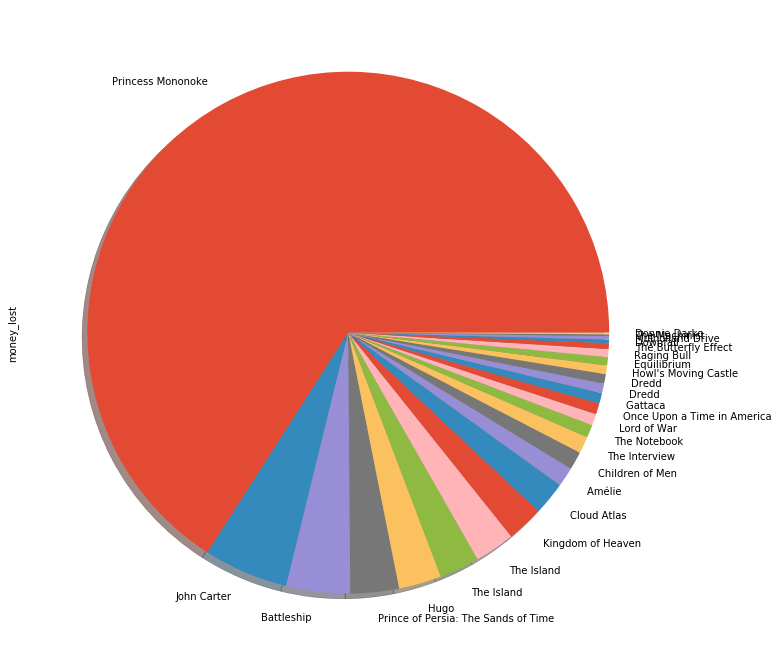

                                        money_lost  gross_budget_ratio
movie_title                                                           
Princess Mononoke                     2.397702e+09            0.000958
John Carter                           1.906413e+08            0.277052
Battleship                            1.438268e+08            0.311833
Prince of Persia: The Sands of Time   1.092444e+08            0.453778
Hugo                                  9.617991e+07            0.434236
The Island                            9.020097e+07            0.284119
The Island                            9.020097e+07            0.284119
Kingdom of Heaven                     8.260330e+07            0.364590
Cloud Atlas                           7.490142e+07            0.265672
Amélie                                4.379834e+07            0.431190
Children of Men                       4.071357e+07            0.464295
The Interview                         3.789482e+07            0.138754
The No

In [88]:
df_flops = data[data.gross_budget_ratio<0.5][data.gross_budget_ratio>0]
df_flops['money_lost'] = (1-df_flops['gross_budget_ratio'])*df_flops['budget']
df_flops = df_flops[df_flops.cast_total_facebook_likes<100000][df_flops.num_voted_users>200000]
df_flops.sort_values(by='money_lost',ascending=False,inplace = True)

#print(df_flops[['original_title','money_lost','vote_average']])

fig, ax = plt.subplots(figsize=(14,12));
plt.style.use('ggplot')
explode=[0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
df_flops['money_lost'].plot(kind='pie', labels=df_flops.movie_title, fontsize=10,shadow=True)
plt.show()

df_flops.set_index('movie_title',inplace=True)

print(df_flops[['money_lost','gross_budget_ratio']])

## 4 Data Pre-processing

### 4.1 Remove Names

In [89]:
df['director_name'].nunique()

1660

In [90]:
df[["actor_1_name", "actor_2_name", "actor_3_name"]].nunique()

actor_1_name    1423
actor_2_name    2168
actor_3_name    2576
dtype: int64

Since all the names are so different for the whole dataset, there is no point to use names to predict score.

Same with plot keywords, they are too diverse to be used in the prediction.

And movie link is also a redundant variable.

In [91]:
df = df.drop(["director_name", "actor_1_name", "actor_2_name", "actor_3_name", 
              "movie_title", "plot_keywords","movie_imdb_link"], axis = 1)

### 4.2 Remove Linear Dependent Variables
For the purpose of data exploration, we added two variables based on existing variables: profit and return_on_investment. In order to avoid multicollinearity, here we remove these two added variables.

In [92]:
df.drop(['profit', 'return_on_investment'], axis = 1, inplace=True)

In [93]:
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


### 4.3 Remove Highly Correlated Variables
First we plot the correlation heatmap for our data.

Text(0.5, 1, 'Correlation Heatmap')

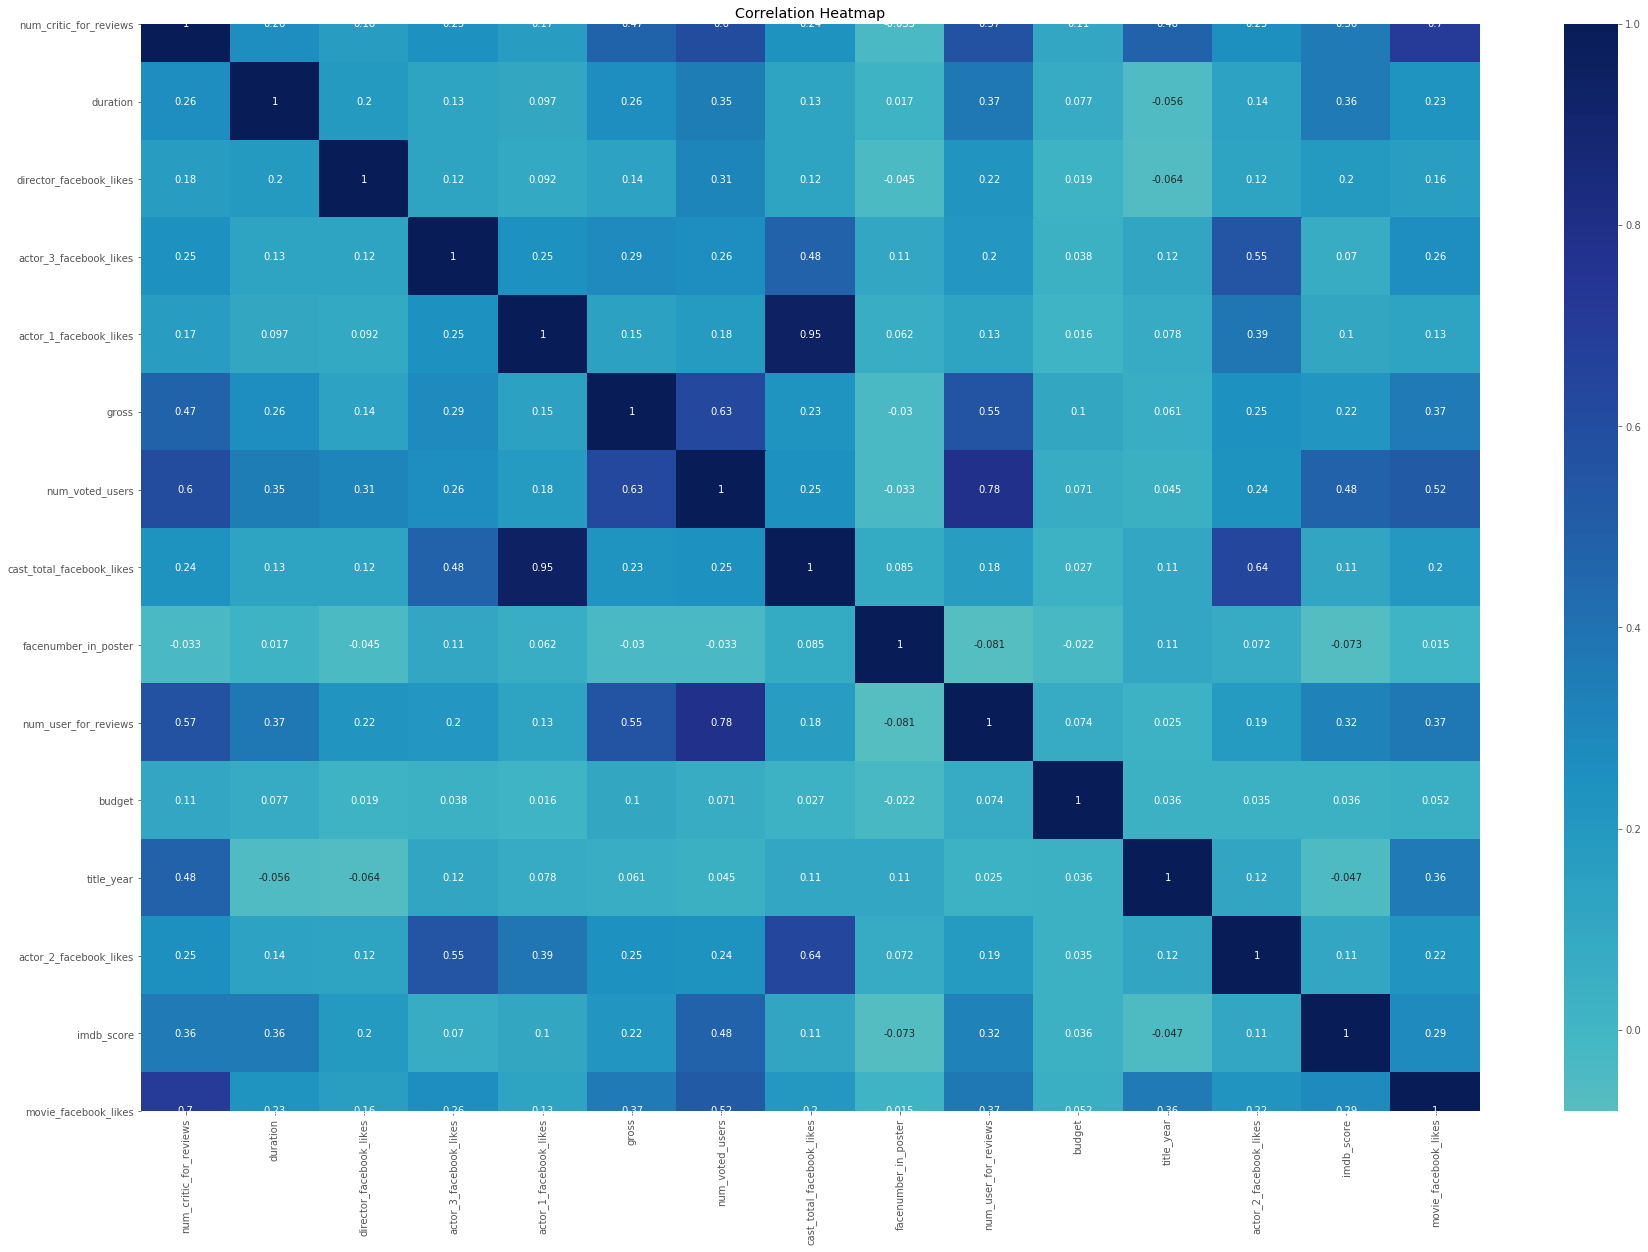

In [94]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), vmax = 1.0, annot=True, cmap="YlGnBu", center = 0)
plt.title("Correlation Heatmap")

Based on the heatmap, we can see some high correlations (greater than 0.7) between predictors.

According to the highest correlation value 0.95, we find actor_1_facebook_likes is highly correlated with the cast_total_facebook_likes, and both actor2 and actor3 are also somehow correlated to the total. So we want to modify them into two variables: actor_1_facebook_likes and other_actors_facebook_likes.

There are high correlations among num_voted_users, num_user_for_reviews and num_critic_for_reviews. We want to keep num_voted_users and take the ratio of num_user_for_reviews and num_critic_for_reviews.

In [95]:
df['other_actors_facebook_likes'] = df['actor_2_facebook_likes'] + df['actor_3_facebook_likes']

df['critic_review_ratio'] = df['num_critic_for_reviews'] / df['num_user_for_reviews']

df.drop(['cast_total_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
        'num_critic_for_reviews', 'num_user_for_reviews'], axis=1, inplace=True)

Now the correlation heatmap becomes like this.

Text(0.5, 1, 'Correlation Heatmap')

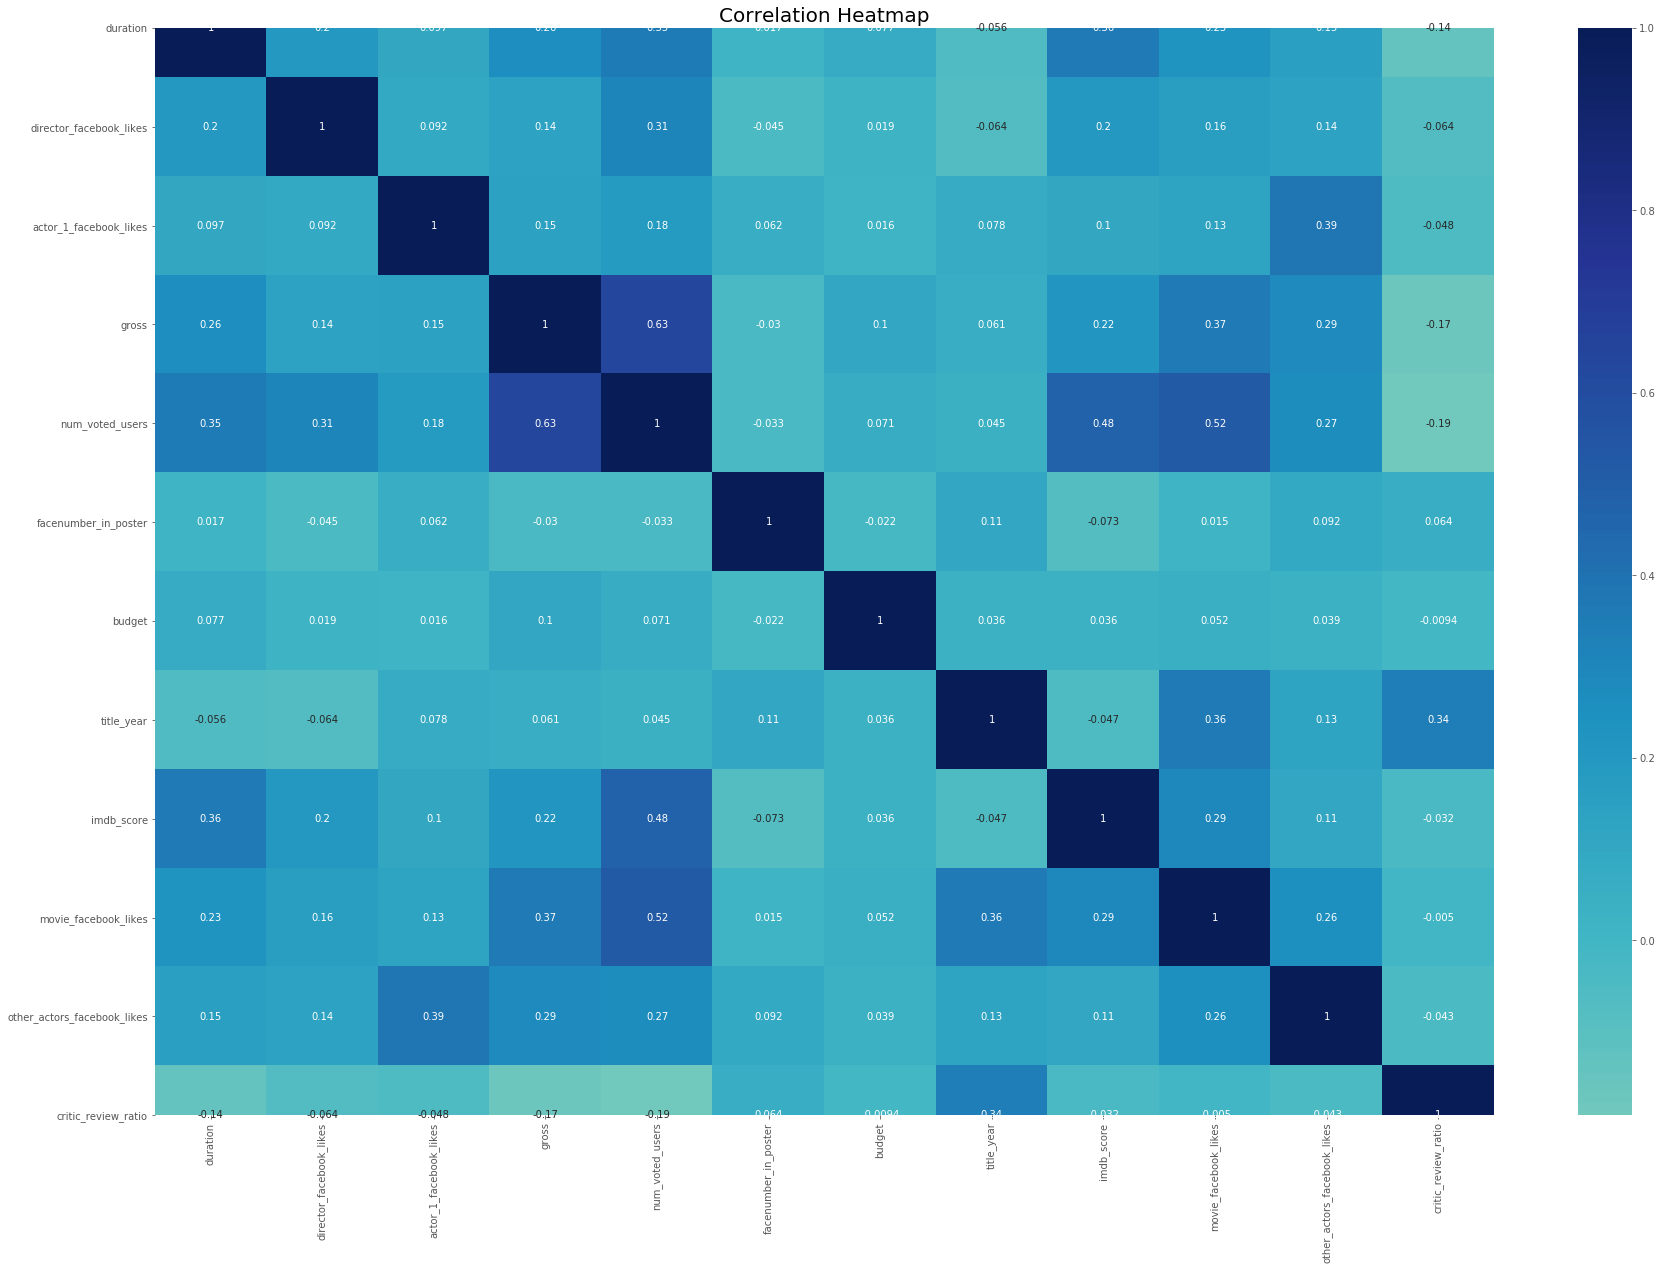

In [96]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(), vmax = 1.0, annot=True, cmap="YlGnBu", center = 0)
plt.title("Correlation Heatmap", fontsize=20)

We don’t see any strong correlation (absolute value greater than 0.7) anymore.

In [97]:
df.head()

,duration,director_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,facenumber_in_poster,country,content_rating,budget,title_year,imdb_score,movie_facebook_likes,other_actors_facebook_likes,critic_review_ratio
0,178.0,0.0,1000.0,760505847.0,886204,0.0,USA,PG-13,237000000.0,2009.0,7.9,33000,1791.0,0.236739
1,169.0,563.0,40000.0,309404152.0,471220,0.0,USA,PG-13,300000000.0,2007.0,7.1,0,6000.0,0.243942
2,148.0,0.0,11000.0,200074175.0,275868,1.0,UK,PG-13,245000000.0,2015.0,6.8,85000,554.0,0.605634
3,164.0,22000.0,27000.0,448130642.0,1144337,0.0,USA,PG-13,250000000.0,2012.0,8.5,164000,46000.0,0.301000
5,132.0,475.0,640.0,73058679.0,212204,1.0,USA,PG-13,263700000.0,2012.0,6.6,24000,1162.0,0.626016


### 4.4 Handling Categorical Variables using Label Encoder

In [98]:
from sklearn.preprocessing import LabelEncoder

df[['country', 'content_rating']] = df[['country', 'content_rating']].apply(LabelEncoder().fit_transform)

### 4.5 Splitting the Data into Testing and Training Dataset

In [99]:
from sklearn.model_selection import train_test_split

X = df.drop('imdb_score', axis = 1)
y = df['imdb_score']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.30, random_state = 7 )

## 5 Implement Algorithm for Data Modeling

In [100]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [101]:
from collections import defaultdict
values = defaultdict(list)
model_names = list()

In [102]:
def err(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print('RMSE: {0:.3f}'.format(rmse))
    print('R2 Score: {0:.3f}'.format(r2))
    
    model_names.append(model_name)
    values['RMSE'].append(rmse)
    values['R2_Score'].append(r2)

### 5.1 Linear Regression Model

In [103]:
LinReg = make_pipeline(RobustScaler(), LinearRegression())
LinReg.fit(X_train, y_train)
err(LinReg, 'Linear_Regression', X_test, y_test)

RMSE: 0.966
R2 Score: 0.190


### 5.2 Lasso Regression Model

In [104]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
lasso.fit(X_train, y_train)
err(lasso, 'Lasso', X_test, y_test)

RMSE: 0.965
R2 Score: 0.191


### 5.3 Ridge Regression Model

In [105]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha = 0.0005, random_state = 1))
ridge.fit(X_train, y_train)
err(ridge, 'Ridge', X_test, y_test)

RMSE: 0.966
R2 Score: 0.190


### 5.4 Elastic Net Regression Model

In [106]:
elnet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, random_state = 1))
elnet.fit(X_train, y_train)
err(elnet, 'Elastic_Net', X_test, y_test)

RMSE: 0.965
R2 Score: 0.191


### 5.5 Decision Tree Regressor

In [107]:
dtr = make_pipeline(RobustScaler(), DecisionTreeRegressor())
dtr.fit(X_train, y_train)
err(dtr, 'Decision Tree', X_test, y_test)

RMSE: 1.004
R2 Score: 0.124


### 5.6 Random Forest Regressor

In [108]:
ranfor = RandomForestRegressor()
ranfor.fit(X_train, y_train)
err(ranfor, 'Random Forest', X_test, y_test)

RMSE: 0.713
R2 Score: 0.558


### 5.7 Gradient Boosting Regressor

In [109]:
gradboost = GradientBoostingRegressor(n_estimators = 1000)
gradboost.fit(X_train, y_train)
err(gradboost, 'Gradient Boosting', X_test, y_test)

RMSE: 0.717
R2 Score: 0.554


### 5.8 XG Boosting Regressor

In [110]:
xgboost = xgb.XGBRegressor(n_estimators = 1000)
xgboost.fit(X_train, y_train)
err(xgboost, 'XG Boost', X_test, y_test)

[14:10:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.710
R2 Score: 0.562


### 5.9 Light GBM Regressor

In [111]:
lgbm = lgb.LGBMRegressor(objective = 'regression', num_leaves = 5, n_estimators = 1000)
lgbm.fit(X_train, y_train)
err(lgbm, 'Light GBM', X_test, y_test)

RMSE: 0.704
R2 Score: 0.569


### 5.10 Comparing Models

In [112]:
Val = pd.DataFrame(values, index = None)
Model = pd.DataFrame(model_names, index = None, columns = ['Model']) 
Val = pd.concat([Model, Val], axis=1, sort=False)

In [113]:
Val

,Model,RMSE,R2_Score
0,Linear_Regression,0.965540,0.189746
1,Lasso,0.964501,0.191488
2,Ridge,0.965539,0.189746
3,Elastic_Net,0.964887,0.190841
4,Decision Tree,1.004152,0.123645
5,Random Forest,0.713218,0.557895
6,Gradient Boosting,0.716730,0.553530
7,XG Boost,0.709559,0.562420
8,Light GBM,0.703839,0.569446


## 6 Conclusion

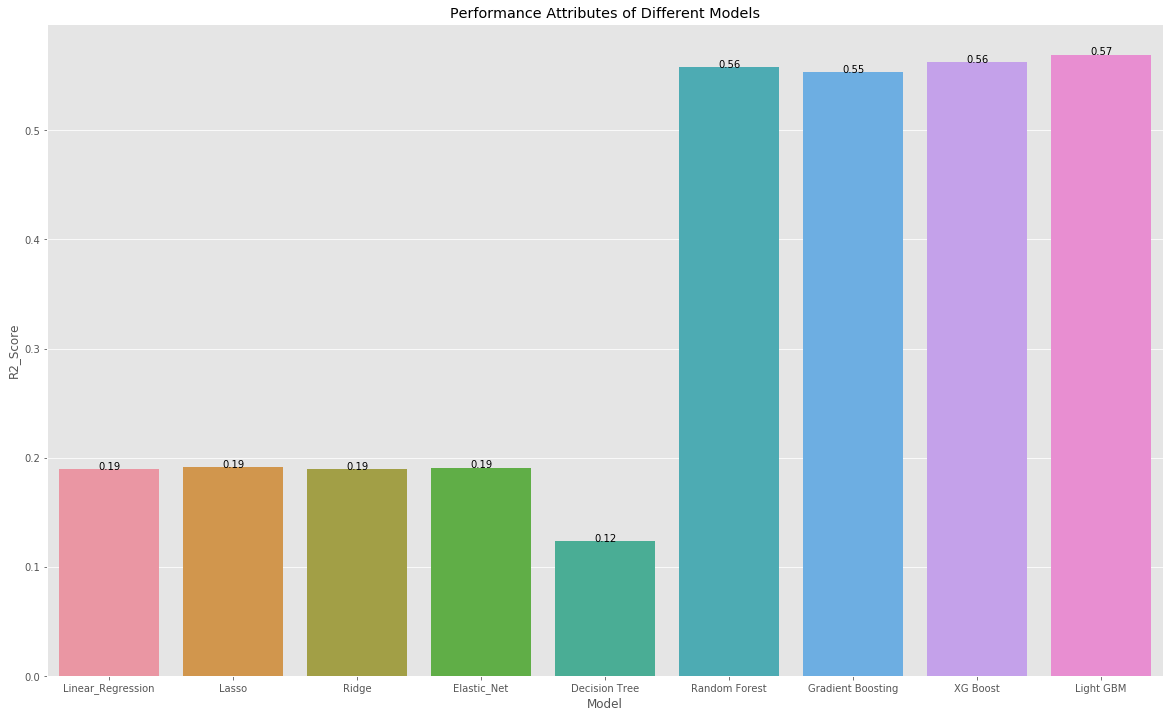

In [114]:
plt.figure(figsize = (20,12))
x_var = 'Model'
g = sns.barplot(x = x_var, y = 'R2_Score', data = Val)
plt.title('Performance Attributes of Different Models')
for index, row in Val.iterrows():
    g.text(row.name,row.R2_Score, round(row.R2_Score,2), color='black', ha="center")

Based on the overall performance, we find the best model is Light GBM model, which gives least Root Mean Square Error of about 0.703 and a highest R^2 score of around 0.57. Therefore, Light GBM model has the hight predictibility power for IMDB Movie Rating Dataset to Predict IMDB Score.